Trained and tested on the same set of training and test data for a fixed number of epochs.

Model structure only vary by the number of hidden layers and sizes, all are based on softmax non-linear transformation.

It's a regression task

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('./test_mse.csv', sep='\t', header=None, names=['hln', 'hls', 'train_mse', 'test_mse'])

In [3]:
df.sort_values('test_mse').head()

,hln,hls,train_mse,test_mse
96,3,49,0.011666,0.012071
94,3,45,0.012172,0.012604
95,3,47,0.012285,0.012742
71,2,49,0.012746,0.013141
120,4,47,0.012854,0.013319


In [4]:
df.shape

(249, 4)

In [5]:
train_mse = df.pivot(index='hln', columns='hls', values='train_mse')

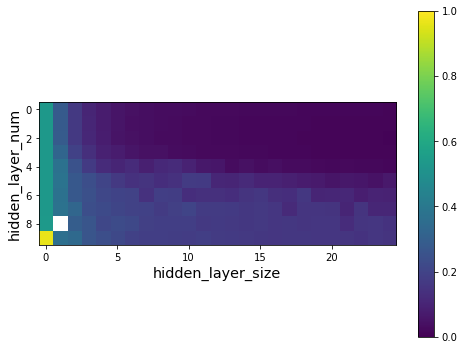

In [6]:
plt.figure(figsize=(8, 6))
plt.imshow(train_mse, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('hidden_layer_size')
plt.ylabel('hidden_layer_num')

In [7]:
test_mse = df.pivot(index='hln', columns='hls', values='test_mse')

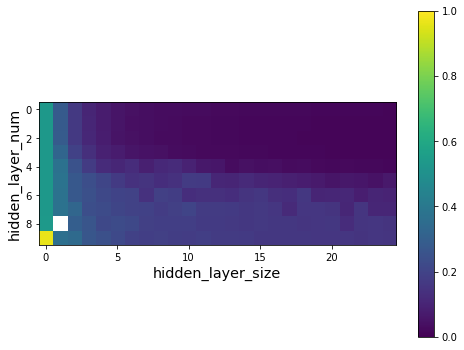

In [8]:
plt.figure(figsize=(8, 6))
plt.imshow(test_mse, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('hidden_layer_size')
plt.ylabel('hidden_layer_num')

It's very interesting that not necessarily more hidden layers will do better, when the training epoches are the same. Colorbar represents MSE

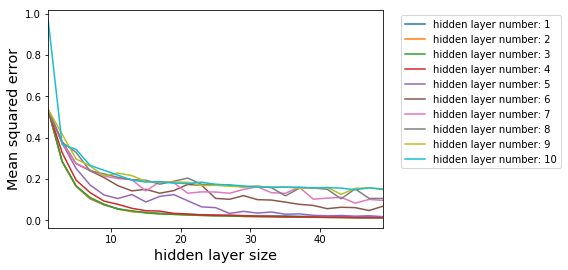

In [9]:
ax = plt.axes()
for k, grp in df.groupby('hln'):
    grp.sort_values('hls').plot(x='hls', y='train_mse', 
                                label='hidden layer number: {0}'.format(grp.hln.unique()[0]), ax=ax)
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.set_xlabel('hidden layer size')
ax.set_ylabel('Mean squared error')

Presumably, the reason for lower performance with more layers is because more layer-NN takes more epoches to train.